In [1]:
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
ppmi_ad = ad.read_h5ad("/Volumes/Elements/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [4]:
# Calculate counts for the "PD" and "Control" diagnoses
pd_control_individuals_counts = (
    ppmi_ad.obs[ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])]
    .groupby('Diagnosis')['Patient']
    .nunique()
)

pd_control_samples_counts = (
    ppmi_ad.obs[ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])].groupby('Diagnosis')['Sample'].nunique()
)

pd_control_samples_counts_males = (
    ppmi_ad.obs[(ppmi_ad.obs['Gender'] == 'Male') & (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control']))].groupby('Diagnosis')['Sample'].nunique()
)

pd_control_samples_counts_females = (
    ppmi_ad.obs[(ppmi_ad.obs['Gender'] == 'Female') & (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control']))].groupby('Diagnosis')['Sample'].nunique()
)


pd_control_50_70_males_counts = (
    ppmi_ad.obs[(ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) & (ppmi_ad.obs['Age_Group'] == '50-70') & (ppmi_ad.obs['Gender'] == 'Male')]
    .groupby('Diagnosis')['Sample']
    .nunique()
)

pd_control_50_70_females_counts = (
    ppmi_ad.obs[(ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) & (ppmi_ad.obs['Age_Group'] == '50-70') & (ppmi_ad.obs['Gender'] == 'Female')]
    .groupby('Diagnosis')['Sample']
    .nunique()
)

print("Patient Counts for diagnosis 'PD':", pd_control_individuals_counts['PD'])
print("Patient Counts for diagnosis 'Control':", pd_control_individuals_counts['Control'])
print("Sample Counts for diagnosis 'PD':", pd_control_samples_counts['PD'])
print("Sample Counts for diagnosis 'Control':", pd_control_samples_counts['Control'])
print("Sample Counts for diagnosis 'PD' Males:", pd_control_samples_counts_males['PD'])
print("Sample Counts for diagnosis 'Control' Males:", pd_control_samples_counts_males['Control'])
print("Sample Counts for diagnosis 'PD' Females:", pd_control_samples_counts_females['PD'])
print("Sample Counts for diagnosis 'Control' Females:", pd_control_samples_counts_females['Control'])
print("Sample Counts for male age group 50-70 PD:", pd_control_50_70_males_counts['PD'])
print("Sample Counts for male age group 50-70 Control:", pd_control_50_70_males_counts['Control'])
print("Sample Counts for female age group 50-70 PD:", pd_control_50_70_females_counts['PD'])
print("Sample Counts for female age group 50-70 Control:", pd_control_50_70_females_counts['Control'])

Patient Counts for diagnosis 'PD': 422
Patient Counts for diagnosis 'Control': 196
Sample Counts for diagnosis 'PD': 1716
Sample Counts for diagnosis 'Control': 869
Sample Counts for diagnosis 'PD' Males: 1119
Sample Counts for diagnosis 'Control' Males: 550
Sample Counts for diagnosis 'PD' Females: 597
Sample Counts for diagnosis 'Control' Females: 319
Sample Counts for male age group 50-70 PD: 727
Sample Counts for male age group 50-70 Control: 360
Sample Counts for female age group 50-70 PD: 410
Sample Counts for female age group 50-70 Control: 219


/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_10733/3778444169.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Diagnosis')['Patient']
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_10733/3778444169.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ppmi_ad.obs[ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])].groupby('Diagnosis')['Sample'].nunique()
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_10733/3778444169.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_39883/3131751337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diagnosis_gender_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)


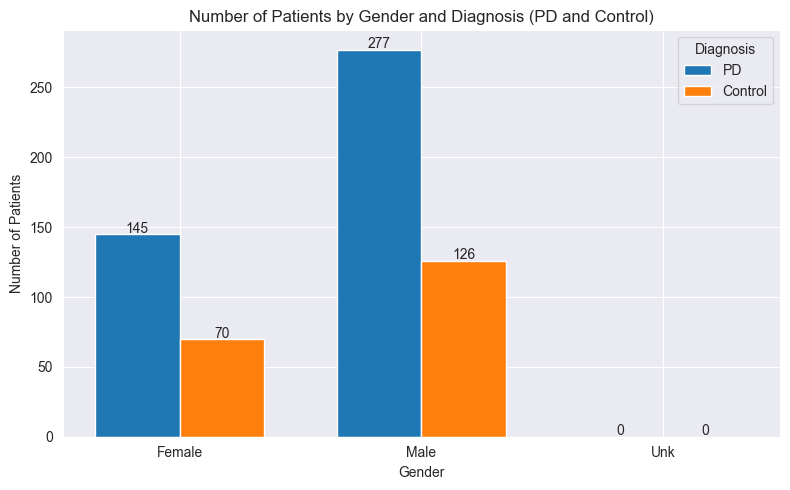

In [10]:
diagnosis_gender_counts = ppmi_ad.obs.groupby(['Gender', 'Diagnosis'])['Patient'].nunique().unstack(fill_value=0)

# Filter only for "PD" and "Control" diagnoses
diagnosis_gender_filtered = diagnosis_gender_counts[['PD', 'Control']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Bar plot
bar_width = 0.35
genders = diagnosis_gender_filtered.index
x = range(len(genders))

for i, diag in enumerate(diagnosis_gender_filtered.columns):
    ax.bar(
        [pos + i * bar_width for pos in x],
        diagnosis_gender_filtered[diag],
        width=bar_width,
        label=diag
    )

# Annotate the bars with absolute numbers
for i, (index, row) in enumerate(diagnosis_gender_filtered.iterrows()):
    for j, value in enumerate(row):
        ax.text(
            i + j * bar_width, value + 1,
            str(value),
            ha='center',
            fontsize=10
        )

# Add plot labels and title
ax.set_title('Number of Patients by Gender and Diagnosis (PD and Control)')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Patients')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(genders)
ax.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_10733/2612570225.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Diagnosis'])['Sample']


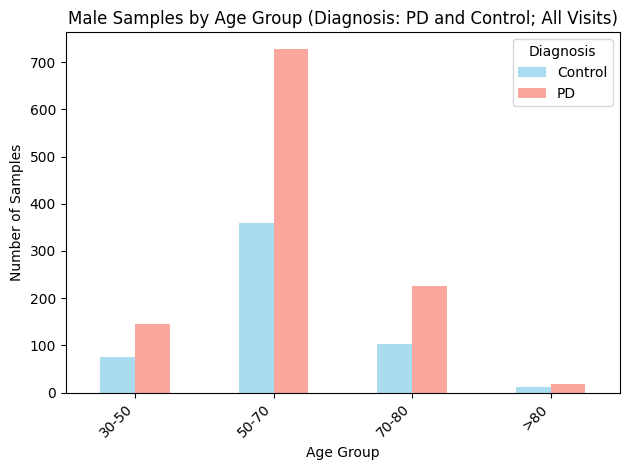

In [6]:
mask = ((ppmi_ad.obs['Gender'] == 'Male') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])) &
        (ppmi_ad.obs['Age_Group'] != 'Unknown'))

ppmi_ad_masked = ppmi_ad[mask]

baseline_age_counts = (
    ppmi_ad_masked.obs
    .groupby(['Age_Group', 'Diagnosis'])['Sample']
    .nunique()
    .unstack(fill_value=0)
)

baseline_age_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Male Samples by Age Group (Diagnosis: PD and Control; All Visits)')
plt.ylabel('Number of Samples')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_10733/1745156894.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Age_Group', 'Diagnosis'])['Sample']


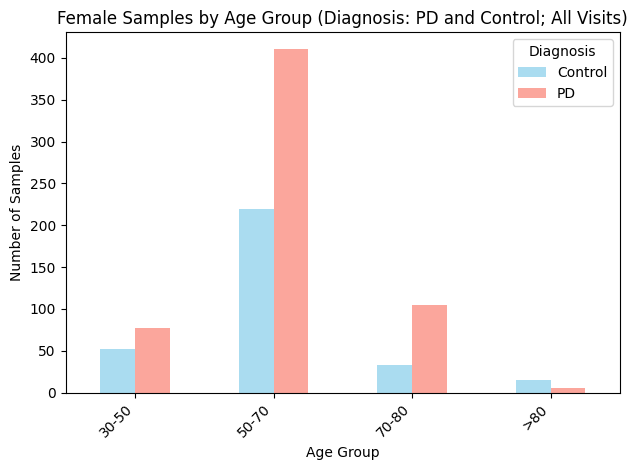

In [5]:
mask = ((ppmi_ad.obs['Gender'] == 'Female') &
        (ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])))

ppmi_ad_masked = ppmi_ad[mask]

baseline_age_counts = (
    ppmi_ad_masked.obs
    .groupby(['Age_Group', 'Diagnosis'])['Sample']
    .nunique()
    .unstack(fill_value=0)
)

baseline_age_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Female Samples by Age Group (Diagnosis: PD and Control; All Visits)')
plt.ylabel('Number of Samples')
plt.xlabel('Age Group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_39883/2300360609.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Visit', 'Diagnosis'])['Patient']


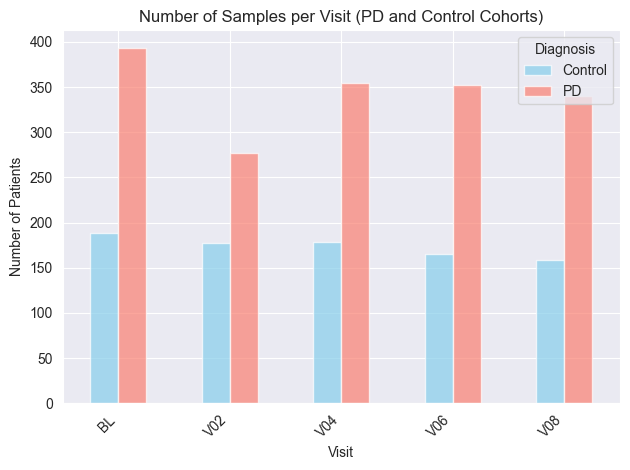

In [15]:
samples_per_visit = (
    ppmi_ad.obs[ppmi_ad.obs['Diagnosis'].isin(['PD', 'Control'])]
    .groupby(['Visit', 'Diagnosis'])['Patient']
    .nunique()
    .unstack(fill_value=0)
)

# Filter out the 'Unk' Visit
samples_per_visit = samples_per_visit[samples_per_visit.index != 'Unk']

samples_per_visit[['Control', 'PD']].plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Number of Samples per Visit (PD and Control Cohorts)')
plt.ylabel('Number of Patients')
plt.xlabel('Visit')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()